Application of GNN for calculating the solubility of Molecule (Graph Level Prediction)

https://medium.com/@tejpal.abhyuday/application-of-gnn-for-calculating-the-solubility-of-molecule-graph-level-prediction-8bac5fabf600

In [ ]:
# Install PyTorch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Install PyTorch Geometric dependencies
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

# Install PyTorch Geometric
!pip install torch-geometric

Looking in indexes: https://download.pytorch.org/whl/cu118
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 15.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 18.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.6/886.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00


In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 11.7 MB/s eta 0:00:00


In [ ]:
import torch
import rdkit
from torch_geometric.datasets import MoleculeNet

/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

#Load the ESOL dataset

Load the ESOL dataset from the MoleculeNet library. It then extracts the SMILES representations of the molecules and their corresponding target values (y), storing them in SMILES_list and y_list respectively. The target values are converted from tensors to lists for better readability. Finally, it prints the first 10 entries from both lists to verify the extracted data.

In [ ]:
# Load the ESOL dataset
dataset = MoleculeNet(root=".", name="ESOL")

# Extract SMILES and target values from the dataset
SMILES_list = [data.smiles for data in dataset]
y_list = [data.y.tolist() for data in dataset]  # Convert tensor to list for better readability

# Print the first few entries to verify
print("SMILES_list:", SMILES_list[:10])
print("y_list:", y_list[:10])

Processing...
Done!


SMILES_list: ['OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', 'Cc1occc1C(=O)Nc2ccccc2', 'CC(C)=CCCC(C)=CC(=O)', 'c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43', 'c1ccsc1', 'c2ccc1scnc1c2 ', 'Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl', 'CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O', 'ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl', 'COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C ']
y_list: [[[-0.7699999809265137]], [[-3.299999952316284]], [[-2.059999942779541]], [[-7.869999885559082]], [[-1.3300000429153442]], [[-1.5]], [[-7.320000171661377]], [[-5.03000020980835]], [[-6.289999961853027]], [[-4.420000076293945]]]


#Visualize a molecule

This code imports the necessary functions from the RDKit library to handle chemical structures. It creates a molecule object from a SMILES string (the first entry in dataset[0]["smiles"]) using Chem.MolFromSmiles(). The molecule object is then displayed in an IPython notebook, allowing for graphical visualization of the molecule's structure.

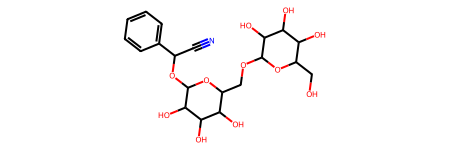

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(dataset[0]["smiles"])
molecule

# Defining the GNN

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GATConv, CGConv, DynamicEdgeConv, GCNConv
from torch_geometric.utils import add_self_loops
from sklearn.model_selection import train_test_split
from torch.nn import Linear
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdMolHash
from rdkit import DataStructs
from rdkit.Chem import AllChem, Descriptors, rdMolDescriptors
from rdkit.Chem import Draw

This code defines a Graph Convolutional Network (GCN) for processing graph-structured data using PyTorch.

1. Model Architecture:

- Embedding Size: The embedding size for the GCN layers is set to 64, which determines the dimensionality of the hidden features.
- GCN Layers: The model consists of several graph convolution layers (GCNConv), which are responsible for learning node embeddings by aggregating information from neighbors in the graphs.
- Global Pooling: After passing through the convolutional layers, the node embeddings are pooled using two global pooling operations: gmp (Global Max Pooling) and gap (Global Average Pooling). These operations aggregate node-level features into a single graph-level feature vector.
- Output Layer: The pooled features are concatenated and passed through a final linear layer (out), which outputs a single value, possibly for regression or classification.
2. Forward Pass:

- The input features (x), edge index (edge_index), and batch index (batch_index) are passed through the GCN layers sequentially.
- After each convolution, the hidden state is passed through a tanh activation function.
- Global pooling is applied on the resulting node embeddings, followed by the output layer to make the final prediction.
3. Model Instantiation:

The model is initialized by creating an instance of the GCN class: model = GCN(). This model can then be trained and used for predictions on graph-structured data.

In [ ]:
embedding_size = 64
num_features=len(dataset.x[0])

class GCN(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # Output layer
        self.out = Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)

        # Global Pooling (stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)
        return out, hidden
model = GCN()

**Convolutional Layers** (https://pytorch-geometric.readthedocs.io/en/2.5.1/modules/nn.html):

MessagePassing
SimpleConv
GCNConv
ChebConv
SAGEConv
CuGraphSAGEConv
GraphConv
GravNetConv
GatedGraphConv
ResGatedGraphConv
GATConv
CuGraphGATConv
FusedGATConv
GATv2Conv
TransformerConv
AGNNConv
TAGConv
GINConv
GINEConv
ARMAConv
SGConv
SSGConv
APPNP
MFConv
RGCNConv
FastRGCNConv
RGCNConv
CuGraphRGCNConv
RGATConv
SignedConv
DNAConv
PointNetConv
GMMConv
SplineConv
NNConv
CGConv
EdgeConv
DynamicEdgeConv
XConv
PPFConv
FeaStConv
PointTransformerConv
HypergraphConv
LEConv
PNAConv
ClusterGCNConv
GENConv
GCN2Conv
PANConv
WLConv
WLConvContinuous
FiLMConv
SuperGATConv
FAConv
EGConv
PDNConv
GeneralConv
HGTConv
HEATConv
HeteroConv
HANConv
LGConv
PointGNNConv
GPSConv
AntiSymmetricConv
DirGNNConv
MixHopConv

**Print structure of the GNN model**

In [ ]:
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


[link text](https://arxiv.org/pdf/1901.00596)

**Root mean squared error**

This code sets up the loss function and optimizer for training a GNN model.

Loss Function (MSELoss):

- loss_fn = torch.nn.MSELoss() creates a Mean Squared Error (MSE) loss function. This is typically used for regression tasks where the goal is to minimize the squared differences between predicted and true values.
Optimizer (Adam):

- optimizer = torch.optim.Adam(model.parameters(), lr=0.0007) initializes the Adam optimizer, which is an adaptive learning rate optimization algorithm. It is set to update the parameters of the model (model.parameters()) with a learning rate of 0.0007. Adam is commonly used for training deep learning models due to its efficiency in handling sparse gradients and noisy data.

Options to select optimizer (https://pytorch.org/docs/main/optim.html):

Adadelta
Adafactor
Adagrad
Adam
AdamW
SparseAdam
Adamax
ASGD
LBFGS
NAdam
RAdam
RMSprop
Rprop
SGD

In [ ]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

**Use GPU for training**

This code sets up the device for model training, allowing it to run on either a GPU or CPU depending on availability.

Device Setup:

- device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") checks if a GPU (CUDA-enabled device) is available. If so, it sets the device to the first GPU (cuda:0); otherwise, it defaults to using the CPU (cpu).
Move Model to Device:

- model = model.to(device) moves the model to the selected device (GPU or CPU), ensuring that computations (such as forward passes and gradient updates) occur on the appropriate hardware. This is crucial for utilizing GPU acceleration during training if available.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

**Wrap data in a data loader**

This code sets up data loaders for batching and shuffling the dataset for training and testing.

Data Size:

- data_size = len(data) calculates the total number of data points (graphs) in the dataset.
Batching:

- NUM_GRAPHS_PER_BATCH = 64 defines the number of graphs per batch for both training and testing.
Training DataLoader:

- loader = DataLoader(data[:int(data_size * 0.8)], batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True) creates a DataLoader for the training set, consisting of the first 80% of the dataset (data[:int(data_size * 0.8)]). The data is shuffled and divided into batches of 64 graphs.
Testing DataLoader:

- test_loader = DataLoader(data[int(data_size * 0.8):], batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True) creates a DataLoader for the test set, which contains the remaining 20% of the data (data[int(data_size * 0.8):]). It also shuffles the data and uses a batch size of 64 graphs.

In [ ]:
data_size = len(dataset)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(dataset[:int(data_size * 0.8)],
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(dataset[int(data_size * 0.8):],
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

**Train the model**


This code defines a training process for the GNN and trains it for multiple epochs.

Train Function (train(data)):

- The function iterates through batches of data from the loader.
GPU Assignment: Each batch is moved to the selected device (GPU or CPU) using batch.to(device).
- Gradient Reset: Before computing the new gradients, optimizer.zero_grad() clears any accumulated gradients from previous iterations.
- Model Prediction: The node features (batch.x), edge indices (batch.edge_index), and batch indices (batch.batch) are passed into the model, which returns predicted values (pred) and embeddings (embedding).
- Loss Calculation and Backpropagation: The loss is computed between the model's predictions and the actual target labels (batch.y). The gradients are computed with loss.backward().
- Parameter Update: The optimizer updates the model’s weights with optimizer.step() based on the gradients.

Training Loop:

- The model is trained for 2000 epochs. After each epoch, the loss is stored in the losses list. Every 100 epochs, the current epoch number and loss are printed.
- This loop continuously updates the model’s parameters to minimize the loss over the training dataset.

In [ ]:
def train(dataset):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)
      # Reset gradients
      optimizer.zero_grad()
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
      # Calculating the loss and gradients
      loss = loss_fn(pred, batch.y)
      loss.backward()
      # Update using the gradients
      optimizer.step()
    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(dataset)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 2.2801513671875
Epoch 100 | Train Loss 1.5900605916976929
Epoch 200 | Train Loss 0.3397570848464966
Epoch 300 | Train Loss 0.26902246475219727
Epoch 400 | Train Loss 0.6930601596832275
Epoch 500 | Train Loss 0.3837786614894867
Epoch 600 | Train Loss 0.4864851236343384
Epoch 700 | Train Loss 0.09255275130271912
Epoch 800 | Train Loss 0.29216933250427246
Epoch 900 | Train Loss 0.42431601881980896
Epoch 1000 | Train Loss 0.2838743031024933
Epoch 1100 | Train Loss 0.28122764825820923
Epoch 1200 | Train Loss 0.0821048840880394
Epoch 1300 | Train Loss 0.33463290333747864
Epoch 1400 | Train Loss 0.027405941858887672
Epoch 1500 | Train Loss 0.2494744062423706
Epoch 1600 | Train Loss 0.0881059467792511
Epoch 1700 | Train Loss 0.05759221315383911
Epoch 1800 | Train Loss 0.04714632034301758
Epoch 1900 | Train Loss 0.02526947855949402


**Visualize learning (training loss)**


- Convert Losses to Floats:

losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] converts the list of losses from tensors to Python floats. This involves moving the loss from the GPU to the CPU (loss.cpu()), detaching it from the computation graph (loss.detach()), and then converting it to a NumPy array and finally a float.
- Loss Indices:

loss_indices = [i for i, l in enumerate(losses_float)] generates a list of indices for the loss values, representing the epoch number or training step at which each loss was recorded.
- Plotting:

plt = sns.lineplot(loss_indices, losses_float) uses Seaborn (sns) to create a line plot, where the x-axis represents the epoch indices (loss_indices), and the y-axis shows the corresponding loss values (losses_float).
- Display Plot:

plt displays the line plot showing how the loss evolves over training epochs.

<Axes: >

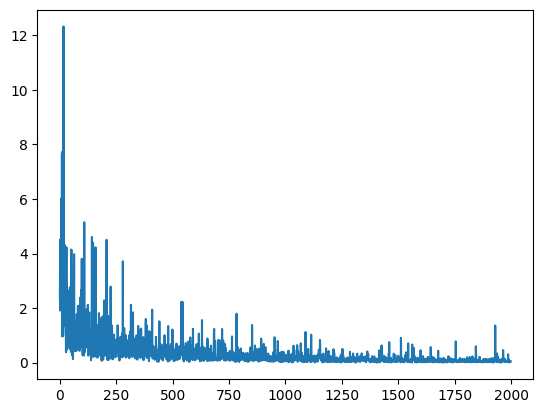

In [ ]:
# Convert losses to float and extract indices
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses]
loss_indices = [i for i, l in enumerate(losses_float)]

# Plot using seaborn, specifying x and y as keyword arguments
plt = sns.lineplot(x=loss_indices, y=losses_float)
plt

**Analyze the results for one batch**


This code performs inference on a batch from the test set and prepares the results for comparison.

- Fetch a Test Batch:

test_batch = next(iter(test_loader)) retrieves the next batch of data from the test data loader.
- Disable Gradient Calculation:

with torch.no_grad(): ensures that no gradients are computed during inference, saving memory and computation time.
- Move Batch to Device:

test_batch.to(device) moves the test batch to the appropriate device (GPU or CPU) for model inference.
- Model Inference:

pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) passes the test batch (containing node features x, edge indices edge_index, and batch indices batch) through the model, generating predictions (pred) and embeddings (embed).
- Create DataFrame:

df = pd.DataFrame() initializes a new Pandas DataFrame.
The true labels (test_batch.y) and predicted values (pred) are converted to lists and stored in the DataFrame as columns y_real and y_pred.
- Flattening Lists:

df["y_real"] = df["y_real"].apply(lambda row: row[0]) and df["y_pred"] = df["y_pred"].apply(lambda row: row[0]) flatten the values in y_real and y_pred, which may have been returned as lists or tensors, into scalar values.
- Final Output:

The DataFrame df is returned, showing the actual (y_real) and predicted (y_pred) values, which can be used for further analysis or evaluation.

In [ ]:
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,-0.800,-0.569509
1,-3.928,-3.395912
2,-3.246,-3.430412
3,-0.742,-1.847818
4,-6.250,-7.179924
...,...,...
59,-4.114,-5.247584
60,-5.160,-5.310246
61,-4.100,-3.328458
62,-6.140,-7.286493


**Plot the predictions**

<Axes: xlabel='y_real', ylabel='y_pred'>

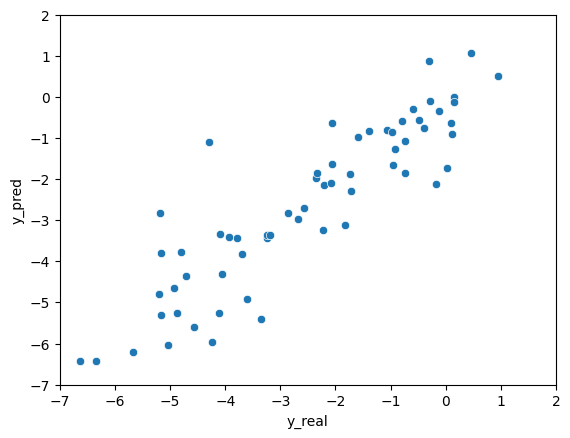

In [ ]:
plt = sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.set(xlim=(-7, 2))
plt.set(ylim=(-7, 2))
plt

**Calculate RMSE**

In [ ]:
# Function to calculate RMSE
y_true=list(df["y_real"])
y_pred=list(df["y_pred"])

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate RMSE
rmse = calculate_rmse(np.array(y_true), np.array(y_pred))

**Application of GNN for calculating the solubility of Molecule (Graph Level Prediction)**

In [ ]:
# Print RMSE
print(f"RMSE: {rmse}")

RMSE: 0.9235388518557675


# We recommend tuned hyperparameters

**Hints**. Changed parameters of the exist model:

- type of Convolutional Layers

- number of layers

- optimizer

- learning rate

- hidden channels

- pooling

- epochs

#**Try by yourselve!**

For your convenience copy code and change

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249
Starting training...
Epoch 0 | Train Loss 11.665947914123535
Epoch 100 | Train Loss 0.8504207730293274
Epoch 200 | Train Loss 1.1154390573501587
Epoch 300 | Train Loss 0.32911959290504456
Epoch 400 | Train Loss 0.23744039237499237
Epoch 500 | Train Loss 0.38848552107810974
Epoch 600 | Train Loss 0.22591347992420197
Epoch 700 | Train Loss 0.06603380292654037
Epoch 800 | Train Loss 0.161929190158844
Epoch 900 | Train Loss 0.1568988561630249
Epoch 1000 | Train Loss 0.046887725591659546
Epoch 1100 | Train Loss 0.03903582692146301
Epoch 1200 | Train Loss 0.15991733968257904
Epoch 1300 | Train Loss 0.08483908325433731
Epoch 1400 | Train Loss 0.04848349094390869
Epoch 1500 | Train Loss 0.018160203471779823
Epoch 1600 | Train Loss 0.02361152321100235
Epoch 1700 | Train Loss 0.02528112567

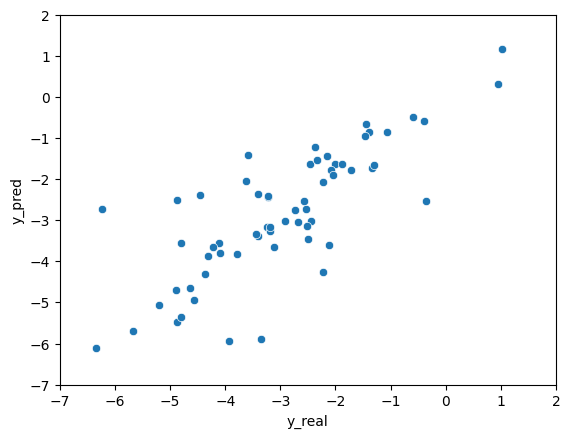

In [ ]:
embedding_size = 64
data=dataset

class GCN(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(len(data.x[0]), embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # Output layer
        self.out = Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)

        # Global Pooling (stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)
        return out, hidden

model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Root mean squared error
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Wrap data in a data loader
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)],
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):],
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)
      # Reset gradients
      optimizer.zero_grad()
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
      # Calculating the loss and gradients
      loss = loss_fn(pred, batch.y)
      loss.backward()
      # Update using the gradients
      optimizer.step()
    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])

plt = sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.set(xlim=(-7, 2))
plt.set(ylim=(-7, 2))
plt

y_true=list(df["y_real"])
y_pred=list(df["y_pred"])

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate RMSE
rmse = calculate_rmse(np.array(y_true), np.array(y_pred))

# Print RMSE
print(f"RMSE: {rmse}")

# Features (rdkit tool)

Change features (9 local features are avalible in rdkit and 5 features are added as global features to each chemical element (same as atomic features))

#Input data

#Features

Note. We estimated all features provided by rdkit, we recommended to select as features only stable ones (fo this we run code 5 times and estimated if they are still without any changes for the same SMILES)

**Define a function to calculate the distance between two points in 3D space**

In [ ]:
def calculate_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2 + (coord1[2] - coord2[2])**2)

**Define a function to extract features based on distances from the center**


This code defines a function *extract_features* that extracts molecular features based on atomic distances from a defined center.

- *SMILES to RDKit Molecule*:

mol = Chem.MolFromSmiles(molecule) converts the SMILES string of the molecule into an RDKit molecule object.
mol = Chem.AddHs(mol) adds hydrogen atoms to the molecule to ensure proper structure representation.
- *3D Conformation Generation*:

AllChem.EmbedMolecule(mol, AllChem.ETKDG()) generates a 3D conformation of the molecule using the ETKDG method (a fast 3D structure generation method in RDKit).
- *Feature Extraction (Atomic Distances)*:

A center point is defined as center = np.array([0.0, 0.0, 0.0]).
The function loops over each atom in the molecule (for atom in mol.GetAtoms()).
For each atom, it retrieves the atom’s 3D coordinates (coord = mol.GetConformer().GetAtomPosition(atom.GetIdx())), then calculates the distance from the atom to the center using the calculate_distance function.
The distances are stored in the features list.
- *Return Features*:

The function returns the list of atomic distances (features), representing the feature vector of the molecule based on atomic distances from the center.

In [ ]:
def extract_features(molecule):
    mol = Chem.MolFromSmiles(molecule)  # Convert SMILES to an RDKit molecule object
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    center = np.array([0.0, 0.0, 0.0])  # Define the center of the molecule
    features = []
    for atom in mol.GetAtoms():
        coord = mol.GetConformer().GetAtomPosition(atom.GetIdx())
        distance = calculate_distance(coord, center)
        features.append(distance)
    return features

**Initialize an empty list to store features for each molecule**


This code processes a list of SMILES strings, converts them to RDKit molecule objects, and extracts both atom-specific and molecule-wide features for each molecule.

1. *Initialize Features List*:

features_list = [] creates an empty list to store the feature sets for all molecules.
2. *Process Each SMILES String*:

The code loops through each SMILES string in SMILES_list and converts it to an RDKit molecule object using Chem.MolFromSmiles(smiles).
3. *Atom-Level Features*:

For each atom in the molecule, the following features are extracted:
- Atomic Number (GetAtomicNum()), Total Number of Hydrogens (GetTotalNumHs()), Valence Electrons (GetTotalValence()), Radical Electrons (GetNumRadicalElectrons()), Formal Charge (GetFormalCharge()), and Hybridization (GetHybridization()).
- Additional custom features are derived from the atomic mass and atomic number, normalized by specific constants for scaling.
4. *Global Features*:

For each atom, a few global features related to the entire molecule are calculated:
- Degree (GetDegree()), which represents the number of bonds the atom has.
- Hydrogen Bond Donor (assigned for oxygen atoms with attached hydrogens).
- Ring Membership (1 if the atom is in a ring structure).
- Rotatable Bonds (calculated using CalcNumRotatableBonds).
- Polar Surface Area (calculated using CalcTPSA).
5. *Storing Features*:

- The list features_lst is created for each atom to store its features, and atom_features_list accumulates these lists for the whole molecule.
- Once the atom-level features are calculated, atom_features_list is appended to features_list, which stores the feature sets for all molecules.
6. *Output*:

The variable features_list holds the extracted features for every atom in every molecule from the input SMILES_list. This list can later be used for analysis or machine learning tasks.

In [ ]:
features_list = []

# Iterate through each SMILES string
for smiles in SMILES_list:
    # Convert SMILES to an RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)

    # Initialize an empty list to store features for each atom
    atom_features_list = []

    # Iterate through each atom in the molecule
    for atom in mol.GetAtoms():
        # Define local features:
        features_lst = [

            int(atom.GetAtomicNum()),  # Atomic number
            int(atom.GetTotalNumHs()),  # Number of hydrogen atoms
            int(atom.GetTotalValence()),  # Number of valence electrons
            int(atom.GetNumRadicalElectrons()),  # Number of radical electrons
            int(atom.GetFormalCharge()),  # Formal charge
            int(atom.GetHybridization()),  # change format for removing: rdkit.Chem.rdchem.HybridizationType.SP in desciptions.
            #Note: For sp1 is marked as rdkit.Chem.rdchem.HybridizationType.SP (without any number).

            #new features from SMILES
            int((atom.GetMass()- 10.812)/116.092),  # Number of valence electrons
            int((atom.GetAtomicNum() - 1.5)/0.6),
            int((atom.GetAtomicNum()- 0.64)/0.76)
        ]

        # Additional global features
        min_degree = atom.GetDegree()
        num_hbond_donors = 1 if atom.GetSymbol() == 'O' and atom.GetTotalNumHs() > 0 else 0
        num_rings = 1 if atom.IsInRing() else 0
        num_rotatable_bonds = rdMolDescriptors.CalcNumRotatableBonds(mol)
        polar_surface_area = rdMolDescriptors.CalcTPSA(mol)  # Calculate polar surface area

        # Append additional features to the atom's features
        features_lst += [min_degree, num_hbond_donors, num_rings, num_rotatable_bonds, int(polar_surface_area)]

        # Append the atom's features to the list
        atom_features_list.append(features_lst)

    # Append the features for each atom to the list
    features_list.append(atom_features_list)
x=features_list
#print(x)

#Edge indexes


This code extracts edge information (bond connections) for each molecule in the SMILES_list by iterating through each molecule's bonds and storing the corresponding atom indices.

- *Initialize Edge List*:

edge_index = [] initializes an empty list to hold edge data for all molecules.
- *Iterate Through SMILES Strings*:

The code processes each SMILES string in SMILES_list by converting it to an RDKit molecule object using Chem.MolFromSmiles(smiles).
- *Extract Atom and Bond Information*:

atoms = mol.GetAtoms() and bonds = mol.GetBonds() fetch the atom and bond information from the molecule.
- *Create Edge Index List*:

For each molecule, an empty list edge_indexes is created to store the bond relationships (edges).

The code loops through each bond in the molecule, retrieves the indices of the atoms connected by the bond (begin_idx and end_idx), and stores the bond in both directions (i.e., [begin_idx, end_idx] and [end_idx, begin_idx]).
- *Store Edge Information*:

The list of edge indexes for the current molecule (edge_indexes) is appended to edge_index.

In [ ]:
# Initialize list to store all edge indexes
edge_index = []

# Iterate through each SMILES string
for smiles in SMILES_list:
    # Convert SMILES string to RDKit Mol object
    mol = Chem.MolFromSmiles(smiles)

    # Get atom and bond information
    atoms = mol.GetAtoms()
    bonds = mol.GetBonds()

    # Initialize edge indexes list for this SMILES
    edge_indexes = []

    # Iterate through bonds to get the edge indexes
    for bond in bonds:
        begin_idx = bond.GetBeginAtomIdx()
        end_idx = bond.GetEndAtomIdx()
        edge_indexes.append([begin_idx, end_idx])
        edge_indexes.append([end_idx, begin_idx])  # Add the reverse direction as well

    # Append the edge indexes for this SMILES to the overall list
    edge_index.append(edge_indexes)

#Input data for the GNN model

This code prepares a list of Data objects, each representing a graph with node features, edges, and target values for graph-based tasks.

1. *Initialize an Empty List*:

data = [] initializes an empty list that will hold Data objects, each representing a graph.
2. *Loop Through Each Graph*:

The loop iterates over each element in the x, edge_index, and y lists (which contain atom features, edge connections, and target values, respectively).
3. *Convert to PyTorch Tensors*:

- x_graph = torch.tensor(x[i], dtype=torch.float32) converts the atom features (list or array) into a PyTorch tensor of type float32.
- edge_index_graph = torch.tensor(edge_index[i], dtype=torch.long).t().contiguous() converts the edge list into a tensor of type long, transposes it, and ensures it's contiguous in memory.
- y_graph = torch.tensor(y[i], dtype=torch.float32) converts the target values into a tensor of type float32.
4. *Create Data Object*:

Data(x=x_graph, edge_index=edge_index_graph, y=y_graph) creates a Data object, which stores the graph's features, edges, and target values.
5. *Store in List*:

data.append(Data(...)) appends the created Data object to the data list.

After the loop, the data list contains a collection of Data objects, each representing a graph with its corresponding features, edges, and targets for use in graph-based models.

In [ ]:
from torch_geometric.datasets import MoleculeNet
import torch
from torch_geometric.data import Data

# Load the ESOL dataset
dataset = MoleculeNet(root=".", name="ESOL")

# Extract target values (y) from the dataset (change format of the data)
y = [[[data.y.item()]] for data in dataset]  # Wrap each target value in a list

In [ ]:
data = []
# Adjust the number of graphs
for i in range(len(x)):
    x_graph = torch.tensor(x[i], dtype=torch.float32)
    edge_index_graph = torch.tensor(edge_index[i], dtype=torch.long).t().contiguous()
    y_graph = torch.tensor(y[i], dtype=torch.float32)
    data_graph = Data(x=x_graph, edge_index=edge_index_graph, y=y_graph)
    data.append(data_graph)

# Code (ESOL library) with modifyed features

RGAT(
  (initial_conv): GCNConv(14, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13569
Starting training...
Epoch 0 | Train Loss 11.453770637512207
Epoch 100 | Train Loss 0.6373330950737
Epoch 200 | Train Loss 0.45406150817871094
Epoch 300 | Train Loss 0.6651291251182556
Epoch 400 | Train Loss 0.3385976254940033
Epoch 500 | Train Loss 0.381710022687912
Epoch 600 | Train Loss 0.5083619952201843
Epoch 700 | Train Loss 0.22448252141475677
Epoch 800 | Train Loss 0.22797571122646332
Epoch 900 | Train Loss 0.14863194525241852
Epoch 1000 | Train Loss 0.05810534581542015
Epoch 1100 | Train Loss 0.038115475326776505
Epoch 1200 | Train Loss 0.03876296803355217
Epoch 1300 | Train Loss 0.20317059755325317
Epoch 1400 | Train Loss 0.0617620013654232
Epoch 1500 | Train Loss 0.022900903597474098
Epoch 1600 | Train Loss 0.005116861313581467
Epoch 1700 | Train Loss 0.0852783396840

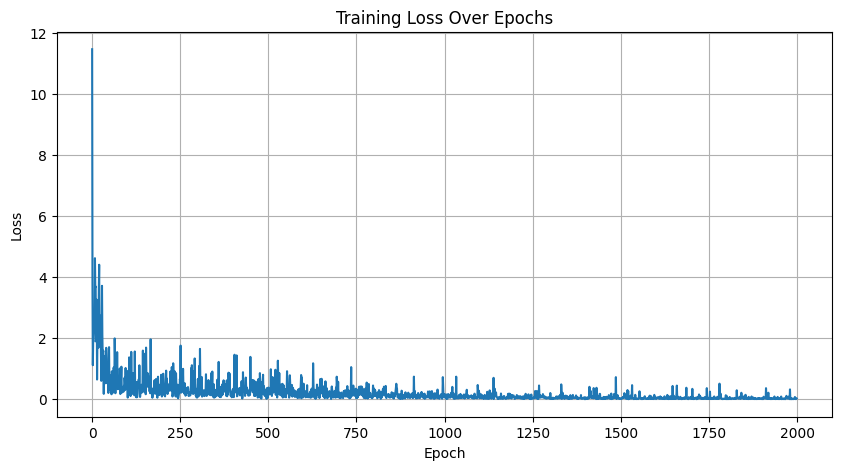

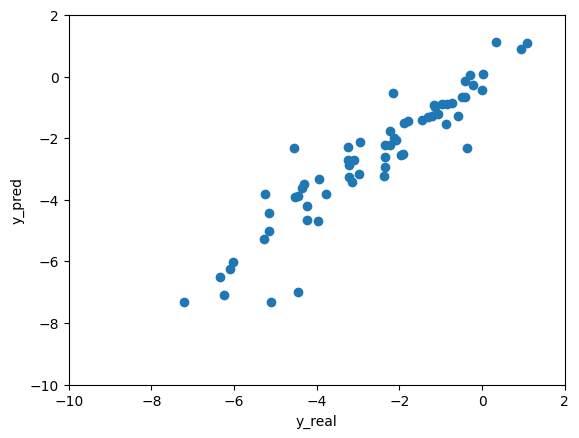

RMSE: 0.7487557540468376


In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.nn import global_mean_pool as gap
embedding_size = 64

class RGAT(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(RGAT, self).__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(len(x[0][0]), embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # Output layer
        self.out = Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)

        # Global Pooling (stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)
        return out, hidden

model = RGAT()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Root mean squared error
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)
loss_fn = torch.nn.MSELoss()

# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Wrap data in a data loader
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)],
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):],
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)
      # Reset gradients
      optimizer.zero_grad()
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
      # Calculating the loss and gradients
      loss = loss_fn(pred, batch.y)
      loss.backward()
      # Update using the gradients
      optimizer.step()
    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

# Assuming you have losses and losses_float defined elsewhere
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses]
loss_indices = [i for i, l in enumerate(losses_float)]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(loss_indices, losses_float)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

# Scatter plot
plt.scatter(df["y_real"], df["y_pred"])

# Set the limits for x and y axes
plt.xlim(-10, 2)
plt.ylim(-10, 2)

# Add labels to x and y axes
plt.xlabel("y_real")
plt.ylabel("y_pred")

# Show the plot
plt.show()

y_true=list(df["y_real"])
y_pred=list(df["y_pred"])

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate RMSE
rmse = calculate_rmse(np.array(y_true), np.array(y_pred))

# Print RMSE
print(f"RMSE: {rmse}")

RMSE = 0.7647 for molecules without the most weakly connected molecules with ID != 0 or ID != 1. (The GNN model without any changes)

https://arxiv.org/pdf/1901.00596

@article{wu2020comprehensive,
  title={A comprehensive survey on graph neural networks},
  author={Wu, Zonghan and Pan, Shirui and Chen, Fengwen and Long, Guodong and Zhang, Chengqi and Philip, S Yu},
  journal={IEEE transactions on neural networks and learning systems},
  volume={32},
  number={1},
  pages={4--24},
  year={2020},
  publisher={IEEE}
}